In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("hw5.ipynb")

# CPSC 330 - Applied Machine Learning 

## Homework 5: Putting it all together 
### Associated lectures: All material till lecture 13 

**Due date: [Monday, Mar 10, 11:59 pm](https://github.com/UBC-CS/cpsc330-2024W2?tab=readme-ov-file#deliverable-due-dates-tentative)**

## Table of contents
0. [Submission instructions](#si)
1. [Understanding the problem](#1)
2. [Data splitting](#2)
3. [EDA](#3)
4. [Feature engineering](#4)
5. [Preprocessing and transformations](#5) 
6. [Baseline model](#6)
7. [Linear models](#7)
8. [Different models](#8)
9. [Feature selection](#9)
10. [Hyperparameter optimization](#10)
11. [Interpretation and feature importances](#11) 
12. [Results on the test set](#12)
13. [Summary of the results](#13)
14. [Your takeaway from the course](#15)

<div class="alert alert-info">

## Submission instructions
<hr>
rubric={points:4}

**You may work with a partner on this homework and submit your assignment as a group.** Below are some instructions on working as a group.  
- The maximum group size is 2. 
- Use group work as an opportunity to collaborate and learn new things from each other. 
- Be respectful to each other and make sure you understand all the concepts in the assignment well. 
- It's your responsibility to make sure that the assignment is submitted by one of the group members before the deadline. 
- You can find the instructions on how to do group submission on Gradescope [here](https://help.gradescope.com/article/m5qz2xsnjy-student-add-group-members).
- If you would like to use late tokens for the homework, all group members must have the necessary late tokens available. Please note that the late tokens will be counted for all members of the group.   


Follow the [homework submission instructions](https://github.com/UBC-CS/cpsc330-2024W2/blob/master/docs/homework_instructions.md). 

1. Before submitting the assignment, run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Clear All Outputs` and then `Run -> Run All Cells`. 
2. Notebooks with cell execution numbers out of order or not starting from "1" will have marks deducted. Notebooks without the output displayed may not be graded at all (because we need to see the output in order to grade your work).
3. Follow the [CPSC 330 homework instructions](https://ubc-cs.github.io/cpsc330-2024W2/docs/homework_instructions.html), which include information on how to do your assignment and how to submit your assignment.
4. Upload your solution on Gradescope. Check out this [Gradescope Student Guide](https://lthub.ubc.ca/guides/gradescope-student-guide/) if you need help with Gradescope submission. 
5. Make sure that the plots and output are rendered properly in your submitted file. If the .ipynb file is too big and doesn't render on Gradescope, also upload a pdf or html in addition to the .ipynb so that the TAs can view your submission on Gradescope.


_Note: The assignments will get gradually more open-ended as we progress through the course. In many cases, there won't be a single correct solution. Sometimes you will have to make your own choices and your own decisions (for example, on what parameter values to use when they are not explicitly provided in the instructions). Use your own judgment in such cases and justify your choices, if necessary._

</div>

<!-- BEGIN QUESTION -->

## Imports

<div class="alert alert-warning">
    
Imports
    
</div>

_Points:_ 0

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split


<!-- END QUESTION -->

## Introduction <a name="in"></a>

In this homework you will be working on an open-ended mini-project, where you will put all the different things you have learned so far together to solve an interesting problem.

A few notes and tips when you work on this mini-project: 

#### Tips
1. This mini-project is open-ended, and while working on it, there might be some situations where you'll have to use your own judgment and make your own decisions (as you would be doing when you work as a data scientist). Make sure you explain your decisions whenever necessary. 
2. **Do not include everything you ever tried in your submission** -- it's fine just to have your final code. That said, your code should be reproducible and well-documented. For example, if you chose your hyperparameters based on some hyperparameter optimization experiment, you should leave in the code for that experiment so that someone else could re-run it and obtain the same hyperparameters, rather than mysteriously just setting the hyperparameters to some (carefully chosen) values in your code. 
3. If you realize that you are repeating a lot of code try to organize it in functions. Clear presentation of your code, experiments, and results is the key to be successful in this lab. You may use code from lecture notes or previous lab solutions with appropriate attributions. 

#### Assessment
We plan to grade fairly and leniently. We don't have some secret target score that you need to achieve to get a good grade. **You'll be assessed on demonstration of mastery of course topics, clear presentation, and the quality of your analysis and results.** For example, if you just have a bunch of code and no text or figures, that's not good. If you do a bunch of sane things and get a lower accuracy than your friend, don't sweat it.


#### A final note
Finally, this style of this "project" question is different from other assignments. It'll be up to you to decide when you're "done" -- in fact, this is one of the hardest parts of real projects. But please don't spend WAY too much time on this... perhaps "a few hours" (15-20 hours???) is a good guideline for this project . Of course if you're having fun you're welcome to spend as much time as you want! But, if so, try not to do it out of perfectionism or getting the best possible grade. Do it because you're learning and enjoying it. Students from the past cohorts have found such kind of labs useful and fun and I hope you enjoy it as well. 

<br><br>

<!-- BEGIN QUESTION -->

## 1. Pick your problem and explain the prediction problem <a name="1"></a>
<hr>
rubric={points:3}

In this mini project, you have the option to choose on which dataset you will be working on. The tasks you will need to carry on will be similar, independently of your choice.

### Option 1
You can choose to work on a classification problem of predicting whether a credit card client will default or not. 
For this problem, you will use [Default of Credit Card Clients Dataset](https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset). In this data set, there are 30,000 examples and 24 features, and the goal is to estimate whether a person will default (fail to pay) their credit card bills; this column is labeled "default.payment.next.month" in the data. The rest of the columns can be used as features. You may take some ideas and compare your results with [the associated research paper](https://www.sciencedirect.com/science/article/pii/S0957417407006719), which is available through [the UBC library](https://www.library.ubc.ca/). 


### Option 2
You can choose to work on a regression problem using a [dataset](https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data) of New York City Airbnb listings from 2019. As usual, you'll need to start by downloading the dataset, then you will try to predict `reviews_per_month`, as a proxy for the popularity of the listing. Airbnb could use this sort of model to predict how popular future listings might be before they are posted, perhaps to help guide hosts create more appealing listings. In reality they might instead use something like vacancy rate or average rating as their target, but we do not have that available here.

> Note there is an updated version of this dataset with more features available [here](http://insideairbnb.com/). The features were are using in `listings.csv.gz` for the New York city datasets. You will also see some other files like `reviews.csv.gz`. For your own interest you may want to explore the expanded dataset and try your analysis there. However, please submit your results on the dataset obtained from Kaggle.


**Your tasks:**

1. Spend some time understanding the options and pick the one you find more interesting (it may help spending some time looking at the documentation available on Kaggle for each dataset).
2. After making your choice, focus on understanding the problem and what each feature means, again using the documentation on the dataset page on Kaggle. Write a few sentences on your initial thoughts on the problem and the dataset. 
3. Download the dataset and read it as a pandas dataframe. 

<div class="alert alert-warning">
    
Solution_1
    
</div>

_Points:_ 3

_Type your answer here, replacing this text._

Option1, Credit Default Prediction

Train different ml models on the dataset from kaggle, and .predict_proba() will provide the probability that the sample fails to pay the next month payment for each samples.(only works for models that support probability)

<2 questions under the inspiration section in kaggle page and my thoughts before starting this project>
How does the probability of default payment vary by categories of different demographic variables?
-> By examining different interpreting methods which is based on ml models we trained, we can get an insight of how much each features contributes to the prediction.
coef_ for linear regression models
feature_importances_ for tree models
SHAP for other models

Which variables are the strongest predictors of default payment?
-> again by looking at interpreting metrics 

In [3]:
clients_df = pd.read_csv("data/UCI_Credit_Card.csv")


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 2. Data splitting <a name="2"></a>
<hr>
rubric={points:2}

**Your tasks:**

1. Split the data into train (70%) and test (30%) portions with `random_state=123`.

> If your computer cannot handle training on 70% training data, make the test split bigger.  

<div class="alert alert-warning">
    
Solution_2
    
</div>

_Points:_ 2

In [4]:
X = clients_df.drop(columns = ["default.payment.next.month"])
y = clients_df["default.payment.next.month"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 3. EDA <a name="3"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Perform exploratory data analysis on the train set.
2. Include at least two summary statistics and two visualizations that you find useful, and accompany each one with a sentence explaining it.
3. Summarize your initial observations about the data. 
4. Pick appropriate metric/metrics for assessment. 

<div class="alert alert-warning">
    
Solution_3
    
</div>

_Points:_ 10

_Type your answer here, replacing this text._

In [5]:
clients_df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [6]:
clients_df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


<h1>Checking for missing value</h1>

In [7]:
clients_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [8]:
clients_df.isnull()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [9]:
clients_df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

<h1>- No missing values</h1>

<h1>Examine the distribution of the target value</h1>

In [10]:
clients_df["default.payment.next.month"].value_counts(normalize=True)

default.payment.next.month
0    0.7788
1    0.2212
Name: proportion, dtype: float64

<Axes: >

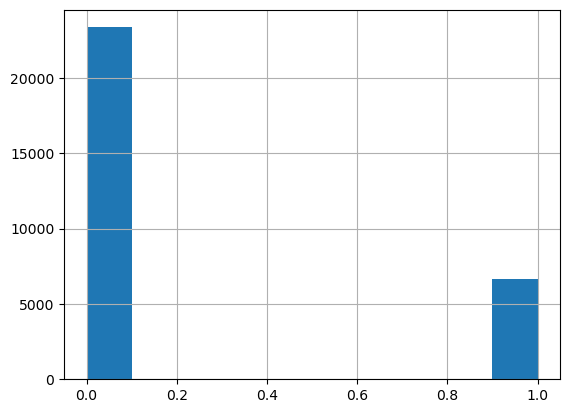

In [11]:
clients_df["default.payment.next.month"].hist() 

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 4. Feature engineering <a name="4"></a>
<hr>
rubric={points:1}

**Your tasks:**

1. Carry out feature engineering. In other words, extract new features relevant for the problem and work with your new feature set in the following exercises. You may have to go back and forth between feature engineering and preprocessing. 

<div class="alert alert-warning">
    
Solution_4
    
</div>

_Points:_ 1

In [12]:
import re

pay_cols = [col for col in X if re.match(r"PAY_[0-9]$", col)]

X_train["max_delay"] = X_train[pay_cols].max(axis = 1)
X_test["max_delay"] = X_test[pay_cols].max(axis =1)

X_train["avg_delay"] = X_train[pay_cols].mean(axis = 1)
X_test["avg_delay"] = X_test[pay_cols].mean(axis =1)

bill_amt_cols = [col for col in X if "BILL_AMT" in col]

X_train["total_bill_amt"] = X_train[bill_amt_cols].sum(axis = 1)
X_test["total_bill_amt"] = X_test[bill_amt_cols].sum(axis = 1)

pay_amt_cols = [col for col in X if "PAY_AMT" in col]

X_train["total_pay_amt"] = X_train[pay_amt_cols].sum(axis = 1)
X_test["total_pay_amt"] = X_test[pay_amt_cols].sum(axis = 1)

# adding one just to avoid dividing by 0
X_train["pay_bill_ratio"] = X_train["total_pay_amt"] / (X_train["total_bill_amt"] + 1)
X_test["pay_bill_ratio"] = X_test["total_pay_amt"] / (X_test["total_bill_amt"] + 1 )

In [13]:
X_train

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,max_delay,avg_delay,total_bill_amt,total_pay_amt,pay_bill_ratio
13986,13987,410000.0,2,2,2,42,0,0,0,-1,...,1031.0,14224.0,132116.0,163020.0,10014.0,0,-0.333333,513987.0,322030.0,0.626532
15216,15217,80000.0,2,2,2,44,0,-1,-1,-2,...,0.0,0.0,0.0,0.0,0.0,0,-1.333333,10391.0,2900.0,0.279061
26948,26949,70000.0,1,2,1,47,0,0,0,0,...,3000.0,2500.0,3000.0,0.0,0.0,0,0.000000,280473.0,10500.0,0.037437
12997,12998,50000.0,1,2,2,30,2,2,2,2,...,0.0,0.0,0.0,200.0,0.0,2,1.333333,600.0,200.0,0.332779
1168,1169,80000.0,2,1,2,23,-1,-1,0,0,...,1000.0,0.0,4318.0,0.0,254.0,0,-0.666667,22337.0,12259.0,0.548796
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819,5820,20000.0,2,2,2,24,2,2,2,2,...,0.0,0.0,186.0,3314.0,3515.0,2,1.000000,26054.0,9299.0,0.356899
7580,7581,360000.0,1,1,1,38,0,0,0,0,...,90054.0,9011.0,3007.0,2592.0,1013.0,0,0.000000,720782.0,109690.0,0.152182
9523,9524,20000.0,2,2,1,43,0,0,0,0,...,1200.0,2000.0,3000.0,1000.0,2000.0,0,0.000000,71466.0,10345.0,0.144752
2083,2084,170000.0,1,2,1,37,-1,-1,-1,-1,...,4920.0,0.0,0.0,1000.0,1030.0,-1,-1.166667,6390.0,6950.0,1.087467


In [14]:
X_train.isnull().sum()

ID                0
LIMIT_BAL         0
SEX               0
EDUCATION         0
MARRIAGE          0
AGE               0
PAY_0             0
PAY_2             0
PAY_3             0
PAY_4             0
PAY_5             0
PAY_6             0
BILL_AMT1         0
BILL_AMT2         0
BILL_AMT3         0
BILL_AMT4         0
BILL_AMT5         0
BILL_AMT6         0
PAY_AMT1          0
PAY_AMT2          0
PAY_AMT3          0
PAY_AMT4          0
PAY_AMT5          0
PAY_AMT6          0
max_delay         0
avg_delay         0
total_bill_amt    0
total_pay_amt     0
pay_bill_ratio    0
dtype: int64

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 5. Preprocessing and transformations <a name="5"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Identify different feature types and the transformations you would apply on each feature type. 
2. Define a column transformer, if necessary. 

<div class="alert alert-warning">
    
Solution_5
    
</div>

_Points:_ 10

<h1>Imputation: not needed because we don't have missing value</h1>

<h1>Encoding: already done, all features are numerical data</h1>

<h1>Scaling: all features except(sex, education, and marriage because those are categorical features)</h1>

In [15]:
categorical_features = ["SEX", "EDUCATION", "MARRIAGE"]  # Make sure column names are correct
numerical_features = X_train.drop(columns=categorical_features).columns

numerical_features

Index(['ID', 'LIMIT_BAL', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
       'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'max_delay', 'avg_delay',
       'total_bill_amt', 'total_pay_amt', 'pay_bill_ratio'],
      dtype='object')

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train[numerical_features])
X_test_scaled = scaler.transform(X_test[numerical_features])

In [17]:
# Convert back to DataFrame
X_train_scaled = pd.DataFrame(X_train_scaled, columns=numerical_features, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=numerical_features, index=X_test.index)

In [18]:
X_train_final = pd.concat([X_train_scaled, X_train.drop(columns=numerical_features)], axis=1)
X_train_final

,ID,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,PAY_AMT5,PAY_AMT6,max_delay,avg_delay,total_bill_amt,total_pay_amt,pay_bill_ratio,SEX,EDUCATION,MARRIAGE
13986,-0.122738,1.876575,0.709290,0.015436,0.110673,0.135806,-0.666523,-0.645683,0.250578,-0.186707,...,10.467366,0.279096,-0.328240,-0.155296,0.635906,4.707833,-0.017721,2,2,2
15216,0.019646,-0.671614,0.926359,0.015436,-0.727457,-0.697605,-1.517094,-1.526903,-1.485242,-0.591191,...,-0.312539,-0.299506,-0.328240,-1.173206,-0.680726,-0.464381,-0.018156,2,2,2
26948,1.377739,-0.748832,1.251961,0.015436,0.110673,0.135806,0.184047,0.235538,0.250578,0.025599,...,-0.312539,-0.299506,-0.328240,0.184007,0.025392,-0.341206,-0.018459,1,2,1
12997,-0.237225,-0.903267,-0.593118,1.806346,1.786934,1.802628,1.885188,1.997978,-1.485242,-0.689490,...,-0.299314,-0.299506,1.159413,1.541221,-0.706325,-0.508141,-0.018089,1,2,2
1168,-1.606546,-0.671614,-1.352856,-0.880019,-0.727457,0.135806,0.184047,-0.645683,-0.617332,-0.644648,...,-0.312539,-0.284830,-0.328240,-0.494599,-0.649494,-0.312698,-0.017819,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819,-1.068148,-1.134921,-1.244322,1.806346,1.786934,1.802628,1.885188,-0.645683,-0.617332,-0.607653,...,-0.093396,-0.096412,1.159413,1.201917,-0.639776,-0.360671,-0.018059,2,2,2
7580,-0.864295,1.490486,0.275154,0.015436,0.110673,0.135806,0.184047,0.235538,0.250578,3.049470,...,-0.141140,-0.240976,-0.328240,0.184007,1.176563,1.266389,-0.018315,1,1,1
9523,-0.639374,-1.134921,0.817825,0.015436,0.110673,0.135806,0.184047,0.235538,0.250578,-0.591474,...,-0.246413,-0.183947,-0.328240,0.184007,-0.521048,-0.343719,-0.018325,2,2,1
2083,-1.500626,0.023347,0.166620,-0.880019,-0.727457,-0.697605,-0.666523,-1.526903,-0.617332,-0.685580,...,-0.246413,-0.239993,-1.072067,-1.003554,-0.691187,-0.398742,-0.017144,1,2,1


In [19]:
X_test_final = pd.concat([X_test_scaled, X_test.drop(columns=numerical_features)], axis=1)
X_test_final

,ID,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,PAY_AMT5,PAY_AMT6,max_delay,avg_delay,total_bill_amt,total_pay_amt,pay_bill_ratio,SEX,EDUCATION,MARRIAGE
9027,-0.696791,2.725972,0.383688,-0.880019,-0.727457,-0.697605,-0.666523,-0.645683,-0.617332,-0.513236,...,0.469074,0.156257,-1.072067,-0.833903,-0.397256,1.327183,-0.017311,1,1,2
22247,0.833553,-0.594396,-1.135788,0.015436,0.110673,0.135806,-0.666523,-0.645683,1.986398,0.505341,...,-0.312539,-0.272061,1.159413,0.184007,-0.253231,-0.425160,-0.018467,2,2,2
5375,-1.119545,1.490486,-0.810186,-1.775475,-1.565588,-1.531015,-1.517094,-1.526903,-1.485242,-0.380907,...,0.480778,-0.085260,-1.815893,-1.851813,-0.539072,0.229483,-0.017620,2,1,2
6542,-0.984454,-0.362742,1.794631,0.015436,0.110673,0.135806,0.184047,0.235538,0.250578,0.885637,...,-0.014971,-0.048166,-0.328240,0.184007,1.139704,-0.063123,-0.018457,2,3,1
17498,0.283810,-1.212139,-0.267516,1.806346,1.786934,1.802628,0.184047,0.235538,0.250578,-0.588265,...,-0.219962,-0.299448,1.159413,1.201917,-0.556422,-0.420606,-0.018385,2,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27075,1.392441,0.255001,-0.593118,0.015436,0.110673,0.135806,0.184047,0.235538,0.250578,0.188776,...,-0.289791,-0.265936,-0.328240,0.184007,0.056677,-0.371627,-0.018469,1,2,2
16095,0.121399,-0.208307,0.058086,0.910891,1.786934,2.636039,1.885188,0.235538,0.250578,0.108380,...,-0.246413,5.131752,1.903240,1.541221,0.111251,1.161350,-0.018093,2,2,1
25278,1.184420,-0.671614,-0.918720,0.015436,0.110673,0.135806,0.184047,0.235538,0.250578,0.038340,...,-0.269557,-0.241727,-0.328240,0.184007,-0.300061,-0.390639,-0.018446,2,3,2
25986,1.266378,-0.671614,-0.050448,0.910891,-0.727457,2.636039,1.885188,0.235538,-0.617332,-0.692187,...,0.081111,-0.299506,1.903240,0.862614,-0.682248,-0.399277,-0.017623,2,2,1


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 6. Baseline model <a name="6"></a>
<hr>
rubric={points:2}

**Your tasks:**
1. Try `scikit-learn`'s baseline model and report results.

<div class="alert alert-warning">
    
Solution_6
    
</div>

_Points:_ 2

In [20]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score

dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train_final, y_train)

DummyClassifier(strategy='most_frequent')

In [21]:
dummy_clf.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [22]:
dummy_clf.score(X_test, y_test)

0.7727777777777778

In [23]:
from sklearn.model_selection import cross_val_score
cv_scores_dum = cross_val_score(dummy_clf, X_train_final, y_train, cv=5)
cv_scores_dum

array([0.78142857, 0.78142857, 0.78142857, 0.78142857, 0.78119048])

In [24]:
print(f"Dummy Classifier Accuracy: {np.mean(cv_scores_dum):.4f} ± {np.std(cv_scores_dum):.4f}")

Dummy Classifier Accuracy: 0.7814 ± 0.0001


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 7. Linear models <a name="7"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Try a linear model as a first real attempt. 
2. Carry out hyperparameter tuning to explore different values for the complexity hyperparameter. 
3. Report cross-validation scores along with standard deviation. 
4. Summarize your results.

<div class="alert alert-warning">
    
Solution_7
    
</div>

_Points:_ 10

_Type your answer here, replacing this text._

In [25]:
from sklearn.linear_model import LogisticRegression

logi_reg = LogisticRegression()

In [26]:
logi_reg = LogisticRegression(C = 0.01)

In [27]:
cv_scores_logi = cross_val_score(logi_reg, X_train_final, y_train, cv=5, scoring="accuracy")

# mean_cv = np.mean(cv_scores)
std_cv = np.std(cv_scores_logi)

print(f"LogisticRegression Accuracy: {np.mean(cv_scores_logi):.4f} ± {np.std(cv_scores_logi):.4f}")

LogisticRegression Accuracy: 0.8054 ± 0.0020


<h1>My logisticRegression model with C = 0.01 predicts the credit default with about ---% accuracy with ---- standard deviation</h1>

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 8. Different models <a name="8"></a>
<hr>
rubric={points:12}

**Your tasks:**
1. Try at least 3 other models aside from a linear model. One of these models should be a tree-based ensemble model. 
2. Summarize your results in terms of overfitting/underfitting and fit and score times. Can you beat a linear model? 

<div class="alert alert-warning">
    
Solution_8
    
</div>

_Points:_ 12

_Type your answer here, replacing this text._

In [28]:
from sklearn.model_selection import cross_validate
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [29]:
gb_clf = GradientBoostingClassifier(n_estimators=10, learning_rate=0.5, max_depth=3, random_state=123)

cv_scores_gb = cross_val_score(gb_clf, X_train_final, y_train, cv=5, scoring="accuracy")

print(f"Gradient Boosting Accuracy: {np.mean(cv_scores_gb):.4f} ± {np.std(cv_scores_gb):.4f}")

cv_table_gb = cross_validate(gb_clf, X_train_final, y_train, cv=5, scoring="accuracy", return_train_score=True)
cv_table_gb_df = pd.DataFrame(cv_table_gb)
cv_table_gb_df

Gradient Boosting Accuracy: 0.8211 ± 0.0019


,fit_time,score_time,test_score,train_score
0,1.019329,0.004302,0.821429,0.826964
1,1.035322,0.004279,0.821667,0.826607
2,0.995742,0.004728,0.821429,0.827202
3,1.030852,0.005343,0.817619,0.828869
4,0.987439,0.005038,0.823333,0.827560


In [30]:
rf_clf = RandomForestClassifier(n_estimators=10, max_depth=5, random_state=123)

cv_scores_rf = cross_val_score(rf_clf, X_train_final, y_train, cv=5, scoring="accuracy")

print(f"Random Forest Accuracy: {np.mean(cv_scores_rf):.4f} ± {np.std(cv_scores_rf):.4f}")

cv_table_rf = cross_validate(rf_clf, X_train_final, y_train, cv=5, scoring="accuracy", return_train_score=True)
cv_table_rf_df = pd.DataFrame(cv_table_rf)
cv_table_rf_df

Random Forest Accuracy: 0.8187 ± 0.0022


,fit_time,score_time,test_score,train_score
0,0.288629,0.007718,0.819762,0.825774
1,0.261056,0.006866,0.815952,0.823988
2,0.245351,0.006545,0.816190,0.824881
3,0.288626,0.007027,0.820000,0.827202
4,0.267949,0.007632,0.821429,0.823214


In [31]:
dt_clf = DecisionTreeClassifier(max_depth=5, random_state=123)

cv_scores_dt = cross_val_score(dt_clf, X_train_final, y_train, cv=5, scoring="accuracy")

print(f"Decision Tree Accuracy: {np.mean(cv_scores_dt):.4f} ± {np.std(cv_scores_dt):.4f}")

cv_table_dt = cross_validate(dt_clf, X_train_final, y_train, cv=5, scoring="accuracy", return_train_score=True)
cv_table_dt_df = pd.DataFrame(cv_table_dt)
cv_table_dt_df

Decision Tree Accuracy: 0.8180 ± 0.0029


,fit_time,score_time,test_score,train_score
0,0.180031,0.003230,0.818095,0.826488
1,0.193695,0.003508,0.816667,0.826429
2,0.205906,0.003730,0.818571,0.827976
3,0.195607,0.003891,0.814048,0.825893
4,0.178543,0.003751,0.822857,0.826786


They are all beating my dummy model and linear model's accuracies. 

Those 3 models have an accuracy of around 80% with decent stability(low standard deviation). GradientBoostingClassifier and RandomForestClassifier could be improved by allowing larger max_depth which comes with larger computing costs. 
SVM takes the longest fitting time despite the lowest average cv score among the three models.
GradientBoostingClassifier and RandomForestClassifier models show lower test_score comparing to its train_score which indicates overfitting.

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 9. Feature selection <a name="9"></a>
<hr>
rubric={points:2}

**Your tasks:**

Make some attempts to select relevant features. You may try `RFECV` or forward selection for this. Do the results improve with feature selection? Summarize your results. If you see improvements in the results, keep feature selection in your pipeline. If not, you may abandon it in the next exercises. 

<div class="alert alert-warning">
    
Solution_9
    
</div>

_Points:_ 2

_Type your answer here, replacing this text._

In [32]:
from sklearn.feature_selection import RFECV

base_model = RandomForestClassifier(n_estimators=10, max_depth=3, random_state=123)

# Perform Recursive Feature Elimination with Cross-Validation
selector = RFECV(base_model, step=1, cv=5, scoring="accuracy", n_jobs=-1)
selector.fit(X_train_final, y_train)

selected_features = X_train_final.columns[selector.support_]
print(f"Selected Features: {selected_features.tolist()}")

# Transform data so it only contains selected features
X_train_selected = selector.transform(X_train_final)
X_test_selected = selector.transform(X_test_final)

# Train the model again with selected features
base_model.fit(X_train_selected, y_train)
accuracy = base_model.score(X_test_selected, y_test)

print(f"Accuracy with selected features: {accuracy:.4f}")


Selected Features: ['PAY_0', 'PAY_2', 'max_delay', 'avg_delay']
Accuracy with selected features: 0.8148


In [33]:
base_model_2 = GradientBoostingClassifier(n_estimators=10,learning_rate=0.5, max_depth=3, random_state=123)

selector = RFECV(base_model_2, step=1, cv=5, scoring="accuracy", n_jobs=-1)
selector.fit(X_train_final, y_train)

selected_features = X_train_final.columns[selector.support_]
print(f"Selected Features: {selected_features.tolist()}")

X_train_selected = selector.transform(X_train_final)
X_test_selected = selector.transform(X_test_final)

# Train the model with selected features
base_model_2.fit(X_train_selected, y_train)
accuracy_2 = base_model_2.score(X_test_selected, y_test)

print(f"Accuracy with selected features: {accuracy_2:.4f}")

Selected Features: ['PAY_0', 'max_delay']
Accuracy with selected features: 0.8142


In [34]:
base_model_3 = DecisionTreeClassifier(max_depth=5, random_state=123)

selector = RFECV(base_model_3, step=1, cv=5, scoring="accuracy", n_jobs=-1)
selector.fit(X_train_final, y_train)

selected_features = X_train_final.columns[selector.support_]
print(f"Selected Features: {selected_features.tolist()}")

X_train_selected = selector.transform(X_train_final)
X_test_selected = selector.transform(X_test_final)

# Train the model with selected features
base_model_3.fit(X_train_selected, y_train)
accuracy_3 = base_model_3.score(X_test_selected, y_test)

print(f"Accuracy with selected features: {accuracy_3:.4f}")

Selected Features: ['PAY_0', 'max_delay']
Accuracy with selected features: 0.8143


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 10. Hyperparameter optimization <a name="10"></a>
<hr>
rubric={points:10}

**Your tasks:**

Make some attempts to optimize hyperparameters for the models you've tried and summarize your results. In at least one case you should be optimizing multiple hyperparameters for a single model. You may use `sklearn`'s methods for hyperparameter optimization or fancier Bayesian optimization methods. 
  - [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)   
  - [RandomizedSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)
  - [scikit-optimize](https://github.com/scikit-optimize/scikit-optimize) 

<div class="alert alert-warning">
    
Solution_10
    
</div>

_Points:_ 10

_Type your answer here, replacing this text._

In [35]:
from sklearn.model_selection import RandomizedSearchCV

In [36]:
parameters_logi = {
    "C": np.logspace(-3,3,10)
}

random_search_logi = RandomizedSearchCV(logi_reg, parameters_logi, n_iter=7, cv=5, scoring="accuracy")
random_search_logi.fit(X_train_final, y_train)

best_C = random_search_logi.best_params_["C"]

print(f"Best C: {best_C:.4f}")
print(f"Best Accuracy: {random_search_logi.best_score_:.4f}")

Best C: 1000.0000
Best Accuracy: 0.8059


In [37]:
parameters_gb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': np.logspace(-2, 0, 5),
    'max_depth': [3, 4, 5, 6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 5, 10],
    'subsample': [0.6, 0.8, 1.0],
    'max_features': ['sqrt', 'log2', None]
}

gb = GradientBoostingClassifier(random_state=123)
random_search_gb = RandomizedSearchCV(gb, parameters_gb, n_iter=3, scoring='accuracy', cv=4, random_state=123)
random_search_gb.fit(X_train_final, y_train)

RandomizedSearchCV(cv=4, estimator=GradientBoostingClassifier(random_state=123),
                   n_iter=3,
                   param_distributions={'learning_rate': array([0.01      , 0.03162278, 0.1       , 0.31622777, 1.        ]),
                                        'max_depth': [3, 4, 5, 6],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': [1, 3, 5, 10],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200],
                                        'subsample': [0.6, 0.8, 1.0]},
                   random_state=123, scoring='accuracy')

In [38]:
print(f"Best parameters: {random_search_gb.best_params_}")
print(f"Best Accuracy: {random_search_gb.best_score_:.4f}")

Best parameters: {'subsample': 1.0, 'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_depth': 3, 'learning_rate': 0.03162277660168379}
Best Accuracy: 0.8221


In [39]:
parameters_rf = {
    "n_estimators": [50, 100, 150],
    "max_depth": [4,5,6], 
    "min_samples_split": [2, 5],  # Minimum samples required to split an internal node
    "min_samples_leaf": [1, 2, 5],  # Minimum samples required at a leaf node
    "max_features": ["sqrt"],  # Number of features to consider for best split
    "bootstrap": [True],  # Whether bootstrap samples are used
}
rf = RandomForestClassifier(random_state=123)
random_search_rf = RandomizedSearchCV(rf, parameters_rf, n_iter=3, scoring='accuracy', cv=3, random_state=123)
random_search_rf.fit(X_train_final, y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=123),
                   n_iter=3,
                   param_distributions={'bootstrap': [True],
                                        'max_depth': [4, 5, 6],
                                        'max_features': ['sqrt'],
                                        'min_samples_leaf': [1, 2, 5],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [50, 100, 150]},
                   random_state=123, scoring='accuracy')

In [40]:
print(f"Best parameters: {random_search_rf.best_params_}")
print(f"Best Accuracy: {random_search_rf.best_score_:.4f}")

Best parameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 6, 'bootstrap': True}
Best Accuracy: 0.8219


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 11. Interpretation and feature importances <a name="1"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Use the methods we saw in class (e.g., `shap`) (or any other methods of your choice) to examine the most important features of one of the non-linear models. 
2. Summarize your observations. 

<div class="alert alert-warning">
    
Solution_11
    
</div>

_Points:_ 10

_Type your answer here, replacing this text._

In [41]:
import shap

In [42]:
logi_reg_final = LogisticRegression(C=best_C)

In [43]:
logi_reg_final.fit(X_train_final,y_train)

LogisticRegression(C=1000.0)

In [44]:


gb_clf_final = GradientBoostingClassifier(subsample=1.0, n_estimators=100, min_samples_split=10, min_samples_leaf=3, max_features="sqrt", max_depth=3, learning_rate=0.03162277660168379)

In [45]:
gb_clf_final.fit(X_train_final,y_train)

GradientBoostingClassifier(learning_rate=0.03162277660168379,
                           max_features='sqrt', min_samples_leaf=3,
                           min_samples_split=10)

In [46]:


rf_clf_final = RandomForestClassifier(n_estimators=100, min_samples_split=2, min_samples_leaf=1, max_features="sqrt", max_depth=6, bootstrap=True)

In [47]:
rf_clf_final.fit(X_train_final,y_train)

RandomForestClassifier(max_depth=6)

In [48]:
explainer_logi = shap.Explainer(logi_reg_final, X_train_final) 
shap_values_logi = explainer_logi(X_test)  # Get SHAP values

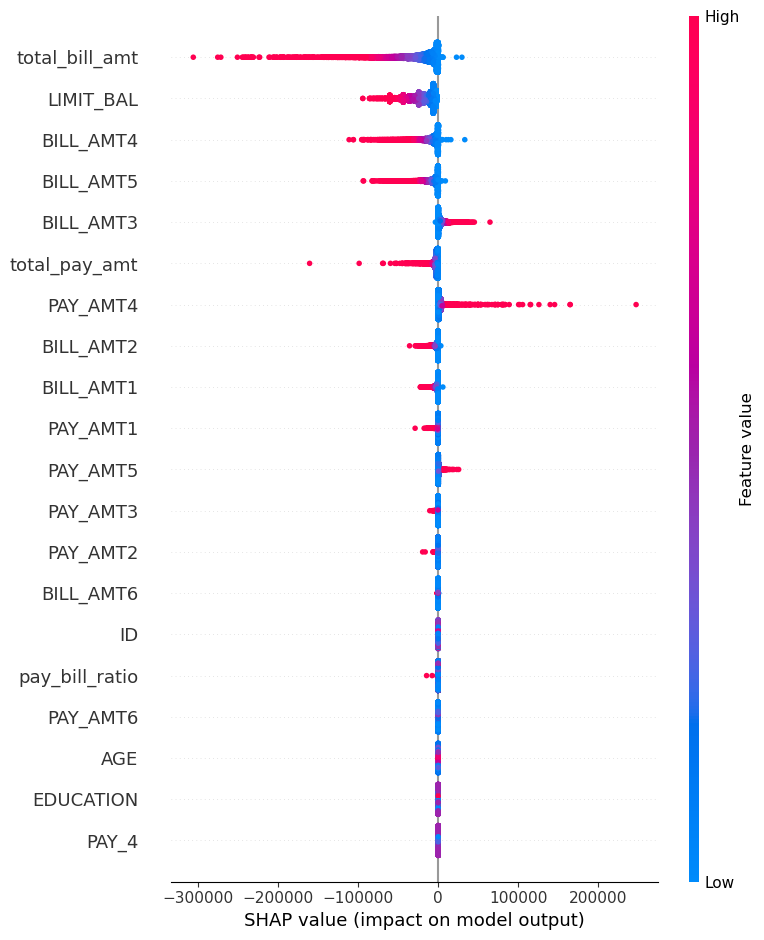

In [49]:
shap.summary_plot(shap_values_logi, X_test)

In [50]:
explainer_rf = shap.Explainer(rf_clf_final, X_train_final) 
shap_values_rf = explainer_rf(X_test)  # Get SHAP values

100%|===================| 17929/18000 [02:20<00:00]        

<Figure size 640x480 with 0 Axes>

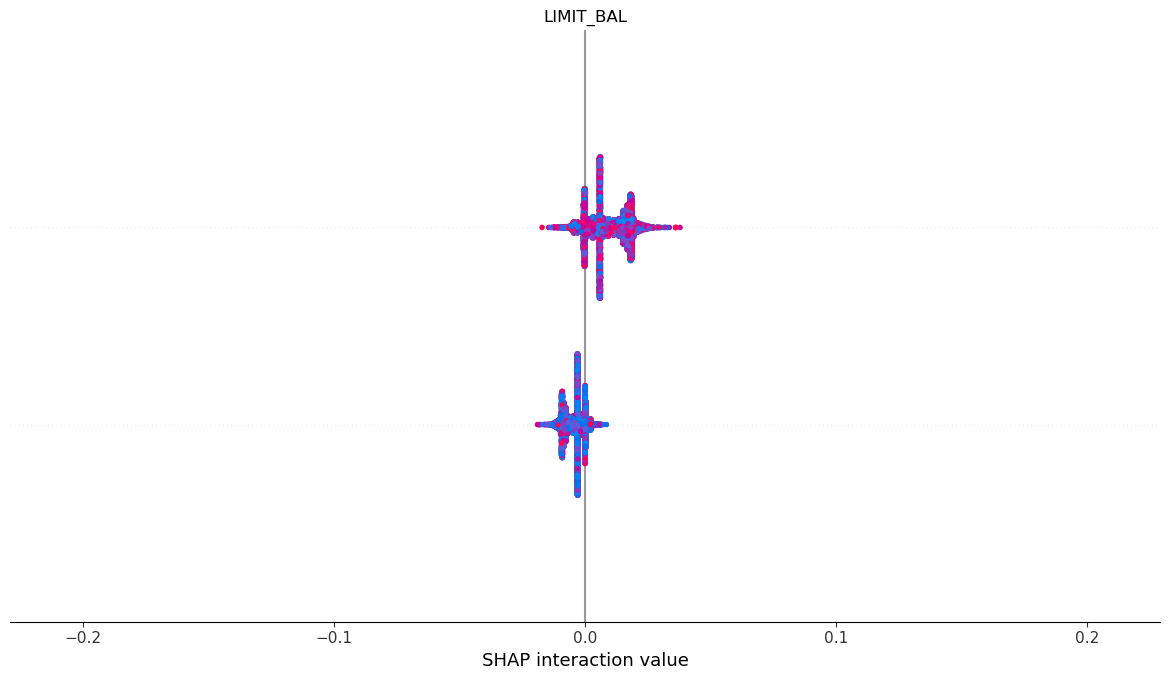

In [51]:
shap.summary_plot(shap_values_rf, X_test)

In [52]:
explainer_gb = shap.Explainer(gb_clf_final, X_train_final)  
shap_values_gb = explainer_gb(X_test)  # Get SHAP values

 96%|=================== | 8607/9000 [00:13<00:00]       

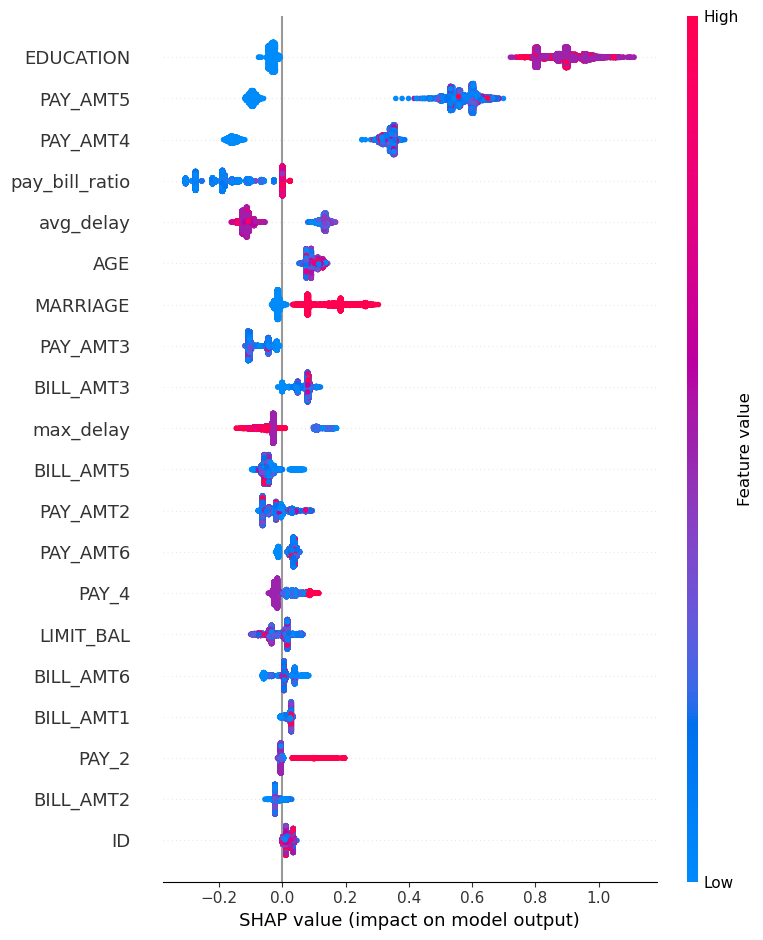

In [53]:
shap.summary_plot(shap_values_gb, X_test)

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 12. Results on the test set <a name="12"></a>
<hr>

rubric={points:10}

**Your tasks:**

1. Try your best performing model on the test data and report test scores. 
2. Do the test scores agree with the validation scores from before? To what extent do you trust your results? Do you think you've had issues with optimization bias? 
3. Take one or two test predictions and explain these individual predictions (e.g., with SHAP force plots).  

<div class="alert alert-warning">
    
Solution_12
    
</div>

_Points:_ 10

_Type your answer here, replacing this text._

In [54]:
best_score=gb_clf_final.score(X_test_final, y_test)

In [55]:
best_score

0.8155555555555556

This score makes sense because mean cross validation score and its standard deviation was:<br>
Gradient Boosting Accuracy: 0.8180 ± 0.0063<br>
A little bit off of the range but not a huge error.<br>
Also lower train score and higher test score demonstrates that the model is not overfitting on the train data and it is rather underfitting slightly.

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 13. Summary of results <a name="13"></a>
<hr>
rubric={points:12}

Imagine that you want to present the summary of these results to your boss and co-workers. 

**Your tasks:**

1. Create a table summarizing important results. 
2. Write concluding remarks.
3. Discuss other ideas that you did not try but could potentially improve the performance/interpretability . 
3. Report your final test score along with the metric you used at the top of this notebook in the [Submission instructions section](#si).

<div class="alert alert-warning">
    
Solution_13
    
</div>

_Points:_ 12

_Type your answer here, replacing this text._

Our goal is to build a machine learning model that predicts whether a credit card client will default on their payment next month. Identifying high-risk clients allows the company to take proactive measures such as adjusting credit limits or offering repayment plans.

In [56]:
gb_clf_final

GradientBoostingClassifier(learning_rate=0.03162277660168379,
                           max_features='sqrt', min_samples_leaf=3,
                           min_samples_split=10)

In [57]:
rf_clf_final

RandomForestClassifier(max_depth=6)

In [58]:
logi_reg_final

LogisticRegression(C=1000.0)

In [59]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred_gb = gb_clf_final.predict(X_test_final)
y_pred_rf = rf_clf_final.predict(X_test_final)
y_pred_logi = logi_reg_final.predict(X_test_final)

print(classification_report(y_test, y_pred_gb))
print(classification_report(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_logi))

conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
conf_matrix_logi = confusion_matrix(y_test, y_pred_logi)

print("Confusion Matrix:\n", conf_matrix_gb)
print("Confusion Matrix:\n", conf_matrix_rf)
print("Confusion Matrix:\n", conf_matrix_logi)

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      6955
           1       0.70      0.33      0.45      2045

    accuracy                           0.82      9000
   macro avg       0.76      0.65      0.67      9000
weighted avg       0.80      0.82      0.79      9000

              precision    recall  f1-score   support

           0       0.83      0.95      0.89      6955
           1       0.70      0.35      0.47      2045

    accuracy                           0.82      9000
   macro avg       0.76      0.65      0.68      9000
weighted avg       0.80      0.82      0.79      9000

              precision    recall  f1-score   support

           0       0.80      0.97      0.88      6955
           1       0.68      0.20      0.31      2045

    accuracy                           0.80      9000
   macro avg       0.74      0.59      0.59      9000
weighted avg       0.78      0.80      0.75      9000

Confusion Matrix:
 

I think I could have done better feature engineering and that could improve the prediction accuracy.<br>
I am not completely sure if my shap score is working properly for random forest model. From what I researched the shap score is a metric used in Game theory so I believe I need to look at mathematical definition of the shap score to perfectly explain what is going on with the shap() methods<br>

<!-- END QUESTION -->

<br><br>

<br><br>

<!-- BEGIN QUESTION -->

## 14. Your takeaway <a name="15"></a>
<hr>
rubric={points:2}

**Your tasks:**

What is your biggest takeaway from the supervised machine learning material we have learned so far? Please write thoughtful answers.  

<div class="alert alert-warning">
    
Solution_14
    
</div>

_Points:_ 2

In [60]:
Understanding Bias-Variance Tradeoff
Feature Engineering Matters More Than Model Choice
Data handling part is more timeconsuming than actual model training 

SyntaxError: invalid syntax (2569083159.py, line 1)

<!-- END QUESTION -->

<br><br>

**PLEASE READ BEFORE YOU SUBMIT:** 

When you are ready to submit your assignment do the following:

1. Run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Clear All Outputs` and then `Run -> Run All Cells`. 
2. Notebooks with cell execution numbers out of order or not starting from "1" will have marks deducted. Notebooks without the output displayed may not be graded at all (because we need to see the output in order to grade your work).
4. Upload the assignment using Gradescope's drag and drop tool. Check out this [Gradescope Student Guide](https://lthub.ubc.ca/guides/gradescope-student-guide/) if you need help with Gradescope submission. 
5. Make sure that the plots and output are rendered properly in your submitted file. If the .ipynb file is too big and doesn't render on Gradescope, also upload a pdf or html in addition to the .ipynb so that the TAs can view your submission on Gradescope. 

This was a tricky one but you did it! 

![](img/eva-well-done.png)